In [1]:
#Import and read data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("World Energy Consumption.csv")

In [2]:
# Drop data from before 1965 and after 2021
data = data.drop(data[data.year < 1965].index)
data = data.drop(data[data.year > 2021].index)
data = data.reset_index(drop=True)

# Pop rows from countries that no longer exist as well as other entities included and put them into another dataframe
indexesToRemove = []
notCountries = pd.DataFrame(columns=data.columns.values)
for i in range(data.shape[0]):
    if pd.isnull(data.iloc[i]['iso_code']):
        notCountries.loc[i] = data.iloc[i]
        indexesToRemove.append(i)        
for ind in indexesToRemove:
    data = data.drop(index=ind)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_22864\29014698.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  notCountries.loc[i] = data.iloc[i]
C:\Users\Adrian\AppData\Local\Temp\ipykernel_22864\29014698.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  notCountries.loc[i] = data.iloc[i]
C:\Users\Adrian\AppData\Local\Temp\ipykernel_22864\29014698.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

In [3]:
# Drop all columns in toDrop
toDrop = ['net_elec_imports', 
          'net_elec_imports_share_demand', 
          'net_elec_imports_share_demand', 
          'primary_energy_consumption']

data = data.drop(columns=toDrop)

In [4]:
# Drop data from antartica
data = data.drop(data[data.year == 'Antartica'].index)

In [5]:
# Save the cleaned data
data.to_csv('data/cleanedData.csv', sep=',', index=False)

In [6]:
#Remove the string columns to be able to look at all the data at once
dataTrun = data.drop(columns=['country', 'iso_code'])

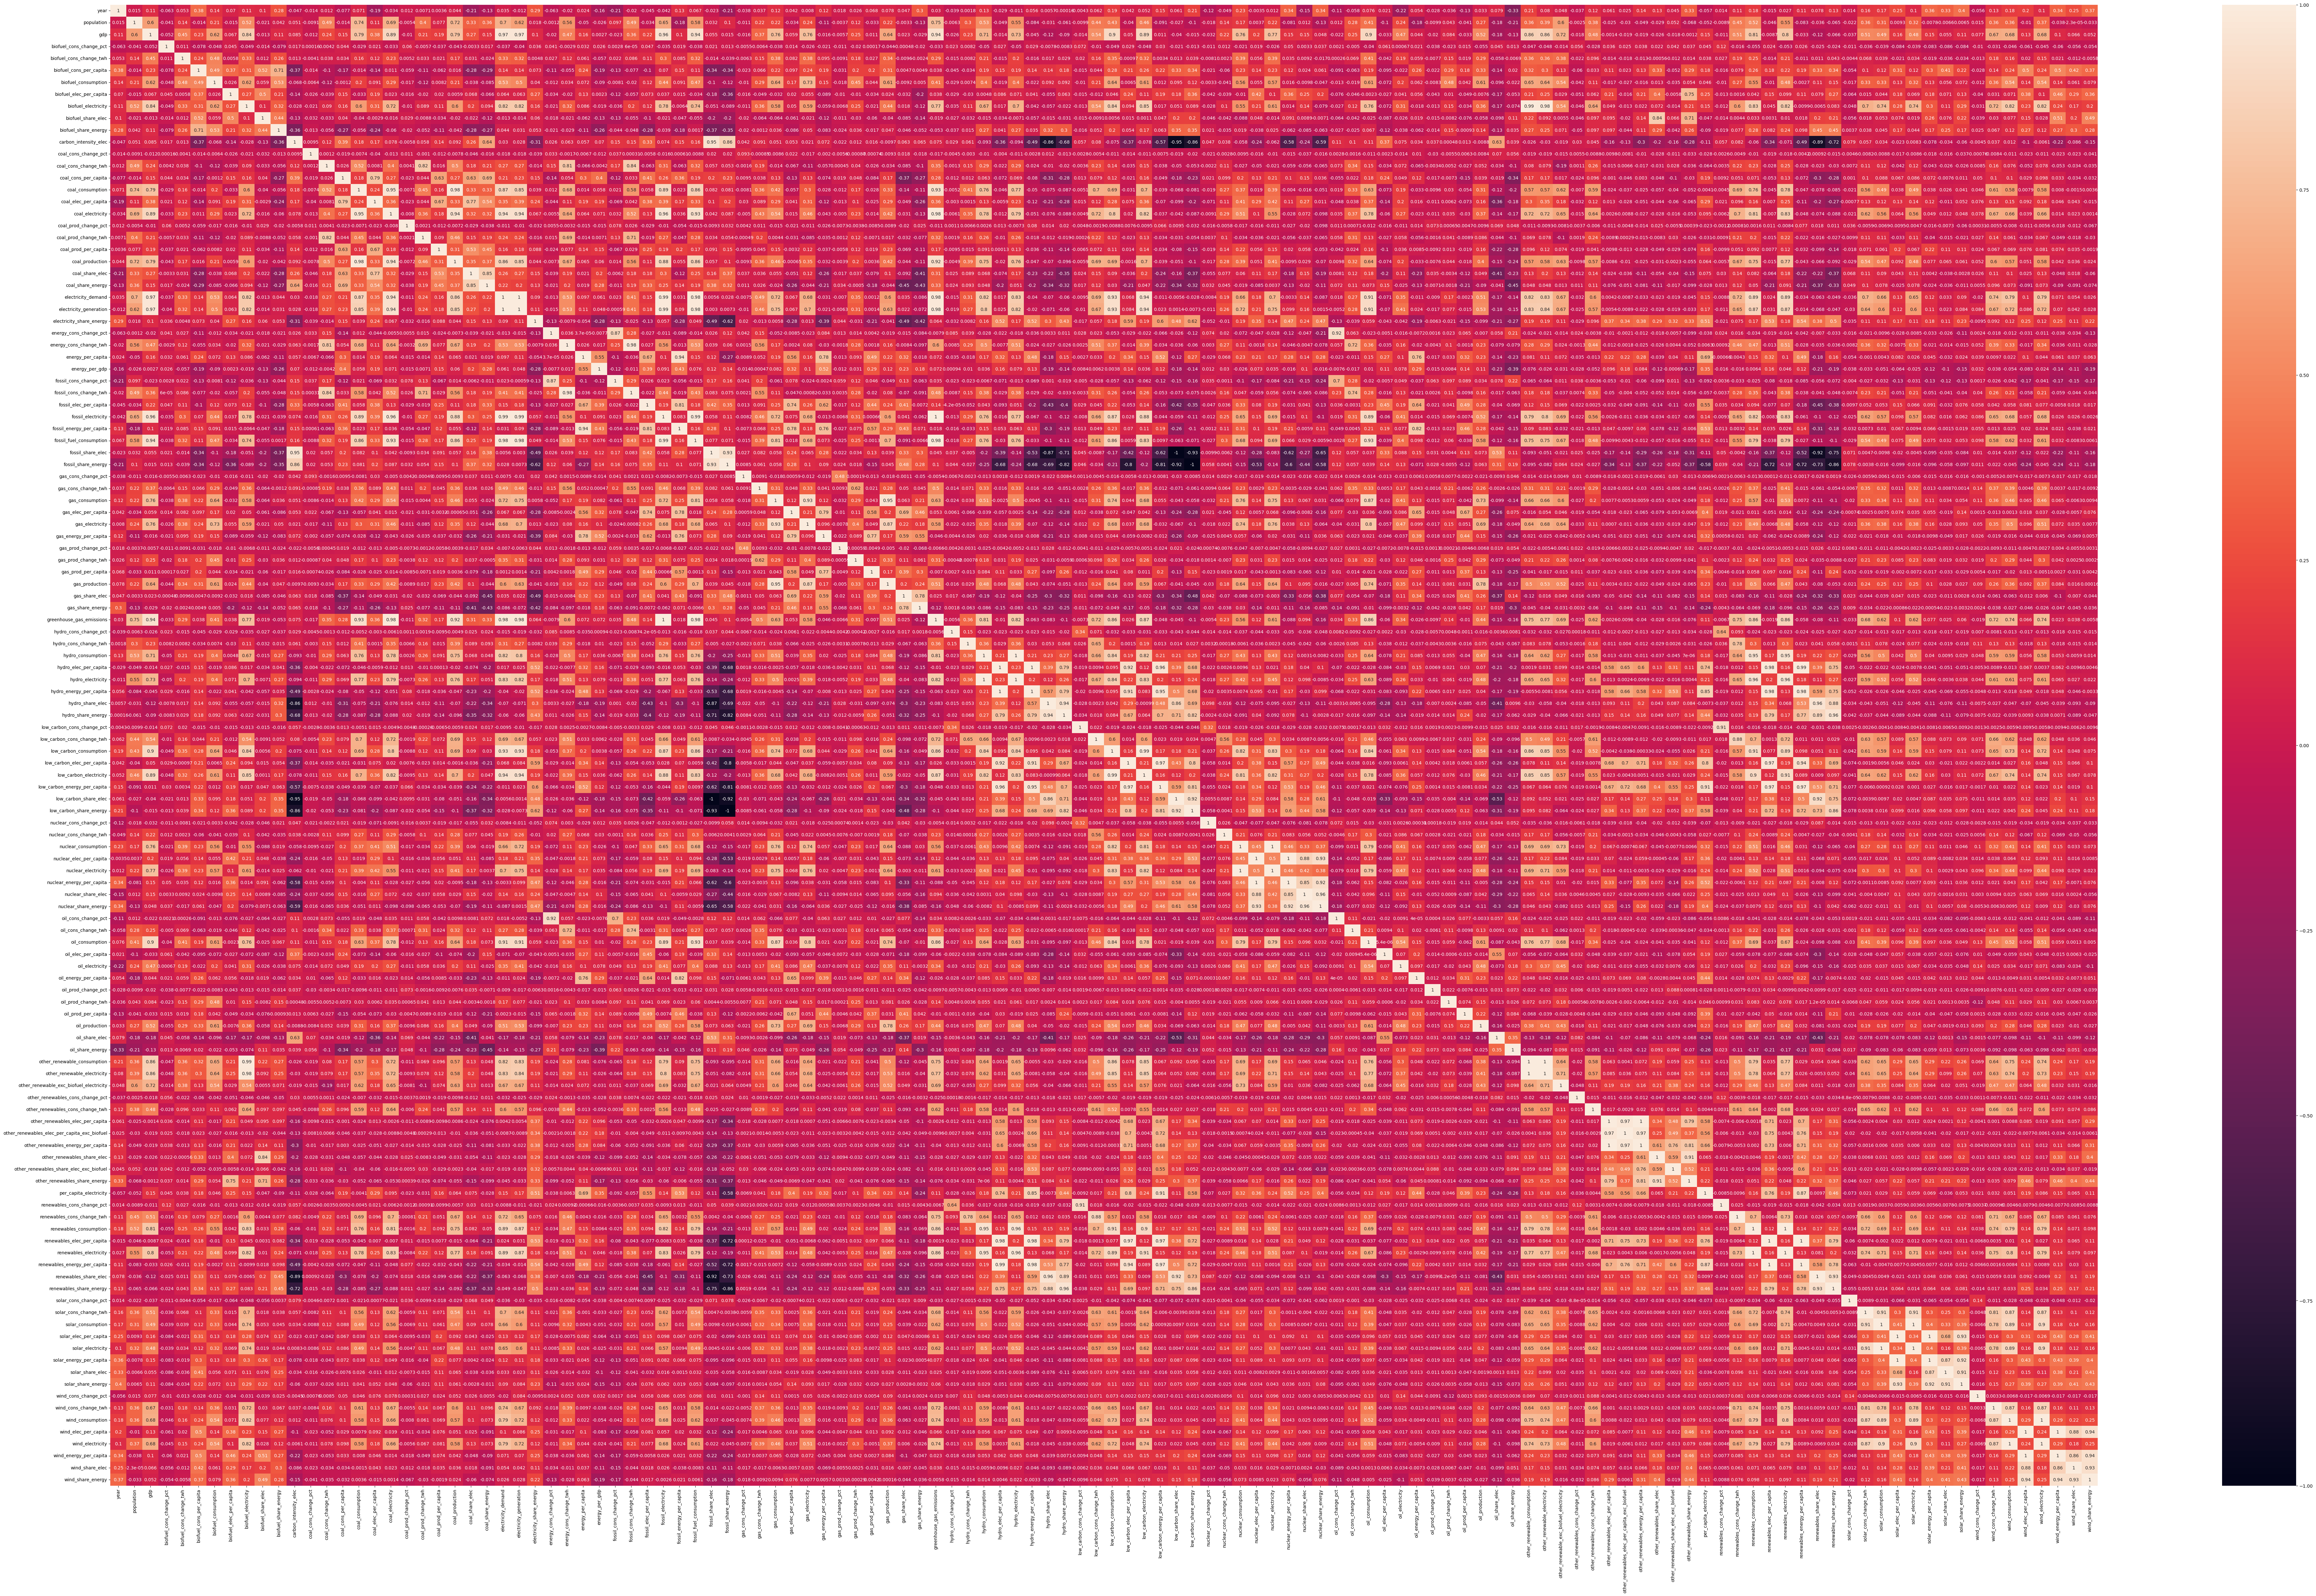

In [7]:
#Plot a heatmap of the correlations of the truncated data
plt.figure(figsize=(100,60))
sns.heatmap(dataTrun.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig('plots/CorrelationHeatmap.png')

In [8]:
#Grab all columns/rows that have a correlation higher than 0.5. These may be interesting values to look at
energyCorr = dataTrun.corr()

energyCorrDict = {}
for row in energyCorr.index:
    energyCorrDict[row] = []
    for column in energyCorr.columns.values:
        if row != column and abs(energyCorr[column][row]) > 0.7:
            energyCorrDict[row].append(column)

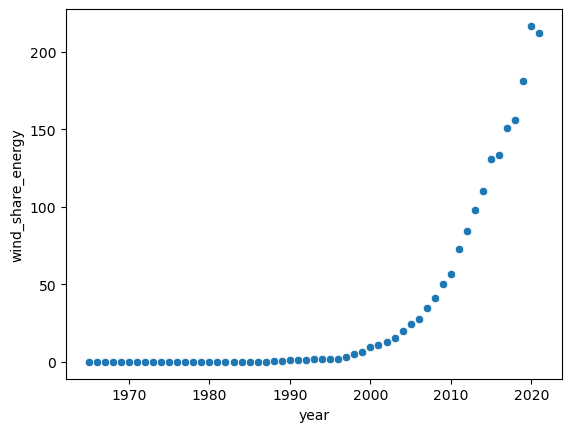

In [9]:
sumOfDataGrouped = dataTrun.groupby('year').sum()
saveLocation = 'plots/'
for column in sumOfDataGrouped.columns:
    plt.clf()
    sns.scatterplot(y=sumOfDataGrouped[column],x=sumOfDataGrouped.index)
    fileName = saveLocation + column + 'EachYear' + 'ScatterPlot.png'
    plt.savefig(fileName)